In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████| 1.21G/1.21G [00:11<00:00, 110MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [2]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Move Data from /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/version/1 to /content/
!mv /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data /content/

In [4]:
audio_dataset_path = '/content/Data/genres_original'
metadata = pd.read_csv('/content/Data/features_30_sec.csv')
metadata.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

## EDA

In [5]:
#View an audio clip
import IPython.display as ipd
ipd.Audio(audio_dataset_path+'/rock/rock.00000.wav')

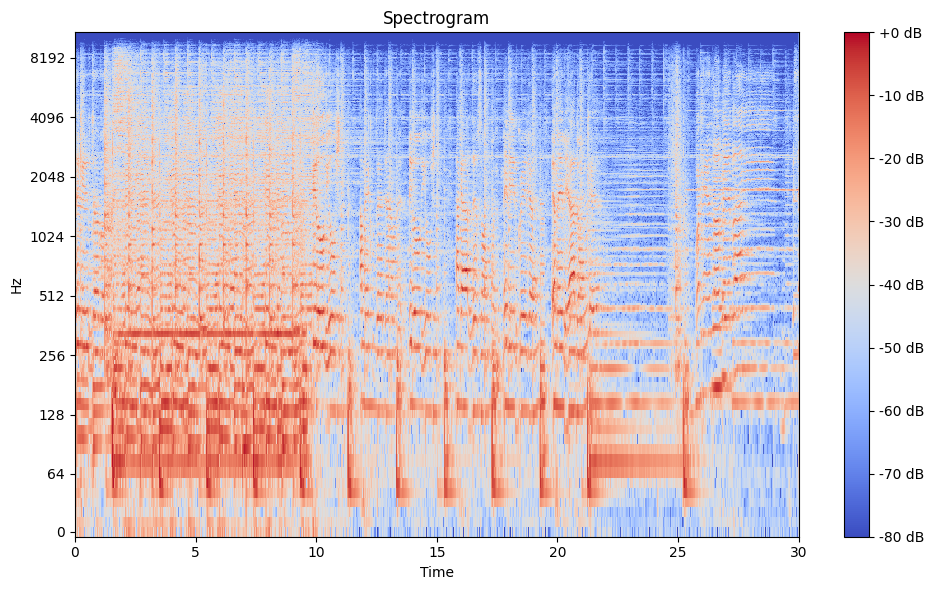

In [6]:
y, sr = librosa.load(audio_dataset_path+'/rock/rock.00000.wav')

# Generate the spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

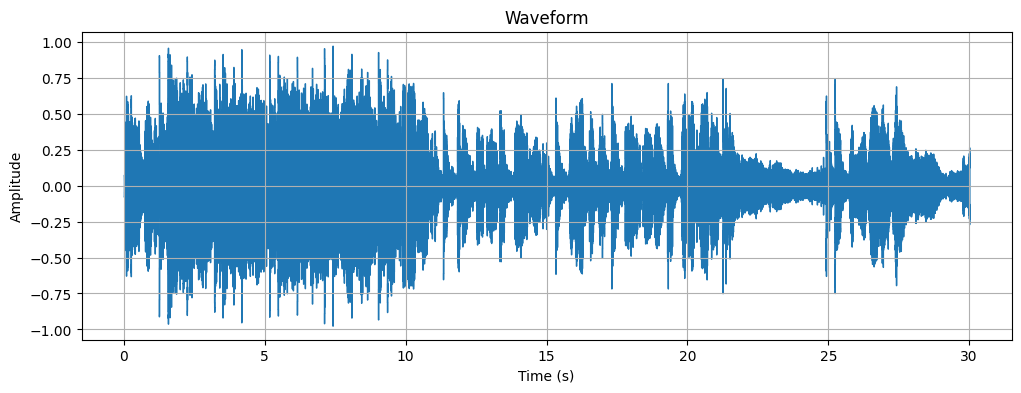

In [7]:
#Waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [8]:
import librosa

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Get audio properties
    length = librosa.get_duration(y=y, sr=sr)  # Length
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)  # Tempo in BPM
    speed = sr / (len(y) / length)  # Speed in samples per second

    # Return the results as a dictionary
    return {
        'length': length,
        'tempo': tempo,
        'speed': speed
    }

# Example usage
file_path = audio_dataset_path+'/rock/rock.00000.wav'  # Replace with your audio file path
audio_details = analyze_audio(file_path)
print(f"Length: {audio_details['length']:.2f} seconds")
print(f"Tempo: {audio_details['tempo']} BPM")
print(f"Speed: {audio_details['speed']:.2f} samples/second")


Length: 30.01 seconds
Tempo: [123.046875] BPM
Speed: 1.00 samples/second


Mel Frequency Cepstral Coefficients:  These are state-of-the-art features used in automatic speech and speech recognition studies. There are a set of steps for generation of these features: Since the audio signals are constantly changing, first we divide these signals into smaller frames. Each frame is around 20-40 ms long Then we try to identify different frequencies present in each frame Now, separate linguistic frequencies from the noise To discard the noise, it then takes discrete cosine transform (DCT) of these frequencies. Using DCT we keep only a specific sequence of frequencies that have a high probability of information. A

### Feature Engineering


In [9]:
def features_extractor(file):
  audio,sample_rate = librosa.load(file,duration=2)
  mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  return mfccs_scaled_features

In [10]:
metadata.drop(labels = 552,axis = 0,inplace=True)

This code iteratively uses feature extractor to get audio file data and the class label from the dataset, and then stores them in a different place using os

In [11]:
#Find the top 200 songs for each genre,
#use the 30 seconds for the data, select parts from 1 audio file and split into 30 second parts
#augment partly

In [12]:
import os
from tqdm import tqdm

extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
  try:
    final_class_labels = row["label"]
    file_name = os.path.join(os.path.abspath(audio_dataset_path),final_class_labels+'/',str(row["filename"]))
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
  except Exception as e:
    print(f"Error: {e}")
    continue

552it [00:05, 91.48it/s] <ipython-input-9-30e7852a7dfa>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sample_rate = librosa.load(file,duration=2)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
562it [00:05, 45.77it/s]

Error: 


999it [00:11, 88.82it/s] 


In [13]:
extracted_features_df = pd.DataFrame(extracted_features,columns = ['feature','class'])
extracted_features_df.head()

feature  class
0  [-118.66585, 125.733345, -20.842743, 42.130047...  blues
1  [-308.54486, 123.74972, 24.979225, 50.120033, ...  blues
2  [-110.480995, 130.23283, -31.878948, 39.093067...  blues
3  [-225.76361, 163.03954, 7.432815, 28.213087, 4...  blues
4  [-190.39511, 148.84398, -39.58332, 27.149437, ...  blues

In [14]:
extracted_features_df['class'].value_counts()

class
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: count, dtype: int64

In [15]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [20]:
num_labels = y.shape[1]

In [21]:
model = Sequential(
    [
        Dense(1024,input_shape=(40,),activation = 'relu'),
        Dropout(0.3),
        Dense(512,activation = 'relu'),
        Dropout(0.3),
        Dense(256,activation = 'relu'),
        Dropout(0.3),
        Dense(128,activation = 'relu'),
        Dropout(0.3),
        Dense(64,activation = 'relu'),
        Dropout(0.3),
        Dense(32,activation = 'relu'),
        Dropout(0.3),
        Dense(num_labels,activation = 'softmax')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741,674 (2.83 MB)

 Trainable params: 741,674 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = 'adam')

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoints = ModelCheckpoint(filepath=f'saved_models/audio_classification.keras',
                              verbose = 1,
                              save_best_only=True)
history = model.fit(X_train,y_train,
                    batch_size = 32,
                    epochs  = 150,
                    validation_data = (X_test,y_test),
                    callbacks=[checkpoints])


Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.0808 - loss: 6.1911
Epoch 1: val_loss improved from inf to 2.29300, saving model to saved_models/audio_classification.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 581ms/step - accuracy: 0.0810 - loss: 6.1302 - val_accuracy: 0.1250 - val_loss: 2.2930
Epoch 2/150
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1125 - loss: 2.7494 
Epoch 2: val_loss did not improve from 2.29300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1140 - loss: 2.7350 - val_accuracy: 0.0850 - val_loss: 2.3122
Epoch 3/150
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0938 - loss: 2.3003
Epoch 3: val_loss improved from 2.29300 to 2.26630, saving model to saved_models/audio_classification.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1162 - loss: 2.4048 - val_accuracy: 0.2100 - val_loss: 2.2663
Epoch 4/150
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1413 - loss: 2.3769 
Epoch 4: val_loss did not improve from 2.26630
2

<Axes: >

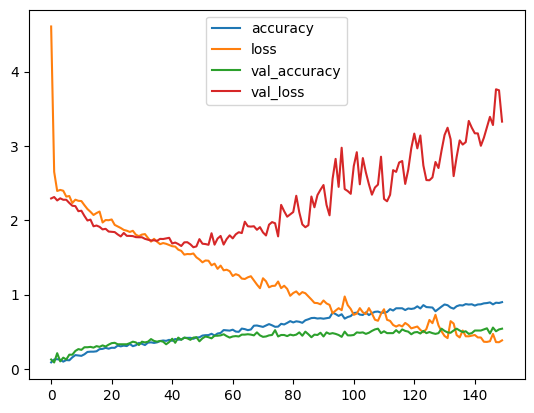

In [25]:
pd.DataFrame(history.history).plot()


# RNN Model

In [26]:
#Feature extractor RNN
def features_extractor(file):
  audio,sample_rate = librosa.load(file,sr = None)
  mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  return mfccs_scaled_features

### Reshape input to 3D for RNN [samples,timesteps,feature]

In [27]:
X_train = np.expand_dims(X_train, axis=1)  # One timestep per sample
X_test = np.expand_dims(X_test, axis=1)

In [28]:
from sklearn.metrics import confusion_matrix

## Buiild RNN Model

In [29]:
from tensorflow.keras.layers import Dropout,BatchNormalization,LSTM

model = Sequential(
    [
        LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.2),  # Dropout after Batch Normalization

        LSTM(128),
        BatchNormalization(),
        Dropout(0.2),  # Dropout after Batch Normalization

        Dense(num_labels, activation='softmax')  # Use num_labels for flexibility
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Changed loss to categorical_crossentropy
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          86,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,426 (861.04 KB)

 Trainable params: 219,914 (859.04 KB)

 Non-trainable params: 512 (2.00 KB)

In [31]:
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.1100 - loss: 3.0005 - val_accuracy: 0.2600 - val_loss: 2.2760
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2292 - loss: 2.3116 - val_accuracy: 0.2550 - val_loss: 2.2647
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2992 - loss: 2.0910 - val_accuracy: 0.2500 - val_loss: 2.2567
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3571 - loss: 1.9283 - val_accuracy: 0.2550 - val_loss: 2.2513
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4028 - loss: 1.7655 - val_accuracy: 0.2350 - val_loss: 2.2469
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4240 - loss: 1.6728 - val_accuracy: 0.2300 - val_loss: 2.2444
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4451 - loss: 1.5654 - val_accuracy: 0.2150 - val_loss: 2.2427
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4962 - loss: 1.4384 - val_accuracy: 0.2000 - val_loss

In [32]:
model.save('/content/bestmodel.keras')

In [33]:
!pip install pydub


In [34]:
from pydub import AudioSegment

def convert_mp3_to_wav(mp3_file, wav_file):
    # Load the MP3 file
    audio = AudioSegment.from_mp3(mp3_file)
    # Export as WAV
    audio.export(wav_file, format='wav')

# Example usage
mp3_path = '/content/music.mp3'  # Replace with your MP3 file path
wav_path = 'converted_audio_file.wav'      # Specify the output WAV file path

convert_mp3_to_wav(mp3_path, wav_path)


In [35]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [36]:
genres = {0:'Blues', 1:'Classical', 2:'Country', 3:'Disco',
          4:'Hip-Hop', 5:'Metal', 6:'Pop', 7:'Reggae',
          8:'Rock', 9:'Jazz'}

In [37]:
def predict_genre(file, model):
    features = features_extractor(file)

    features = np.expand_dims(features, axis=0)  # Add batch dimension
    features = np.expand_dims(features, axis=1)  # Add timestep dimension

    predictions = model.predict(features)

    # Step 4: Get the predicted genre (assuming you have a mapping of indices to genres)
    predicted_index = np.argmax(predictions, axis=1)[0]
    return genres[predicted_index]

# Example usage
file_path = 'converted_audio_file.wav'  # Replace with your file path
predicted_genre_index = predict_genre(file_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


In [38]:
print(predicted_genre_index)

Jazz


In [39]:
from tensorflow.keras.models import load_model

In [40]:
model2 = load_model('/content/saved_models/audio_classification.keras')

In [41]:
def predict_genre_rnn(file, model):
    features = features_extractor(file)

    features = np.expand_dims(features, axis=0)  # Add batch dimension
    # features = np.expand_dims(features, axis=1)  # Remove this line - timestep dimension not needed

    predictions = model.predict(features)

    # Step 4: Get the predicted genre (assuming you have a mapping of indices to genres)
    predicted_index = np.argmax(predictions, axis=1)[0]
    return predicted_index

In [42]:
file_path = 'converted_audio_file.wav'  # Replace with your file path
predicted_genre_index = predict_genre_rnn(file_path, model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


In [43]:
print(predicted_genre_index)

9


# CNN Model

In [44]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())
y = to_categorical(labelencoder.fit_transform(y))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Input(shape=(X.shape[1],)))
model.add(layers.Reshape((X.shape[1], 1)))

model.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.1374 - loss: 3.5908 - val_accuracy: 0.3050 - val_loss: 1.9374
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3543 - loss: 1.8015 - val_accuracy: 0.3500 - val_loss: 1.6665
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4121 - loss: 1.5478 - val_accuracy: 0.4200 - val_loss: 1.6675
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 1.3645 - val_accuracy: 0.5000 - val_loss: 1.5105
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5662 - loss: 1.1870 - val_accuracy: 0.4850 - val_loss: 1.4963
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6385 - loss: 1.0486 - val_accuracy: 0.5050 - val_loss: 1.4933
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.9486 - val_accuracy: 0.5450 - val_loss: 1.4430
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.8234 - val_accuracy: 0.4800 - val_lo

# Simple classification model

In [47]:
df = pd.read_csv('/content/Data/features_3_sec.csv')

In [48]:
df.drop(labels = "filename",inplace =True ,axis = 1)

In [49]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [50]:
X = np.array(df.iloc[:,:-1],dtype = float)
y=converter.fit_transform(class_list)

In [51]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [52]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [53]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [55]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(256,activation='relu'),
    Dropout(0.2),

    Dense(128,activation='relu'),
    Dropout(0.2),

    Dense(64,activation='relu'),
    Dropout(0.2),

    Dense(10,activation='softmax'),
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │          30,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,338 (794.29 KB)

 Trainable params: 203,338 (794.29 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [57]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [58]:
model_history=trainModel(model=model,epochs=100,optimizer='adam')

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.3181 - loss: 1.8955 - val_accuracy: 0.6272 - val_loss: 1.0985
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5865 - loss: 1.1803 - val_accuracy: 0.6952 - val_loss: 0.8996
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6651 - loss: 0.9719 - val_accuracy: 0.7398 - val_loss: 0.7760
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7176 - loss: 0.8236 - val_accuracy: 0.7753 - val_loss: 0.6959
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7510 - loss: 0.7459 - val_accuracy: 0.7941 - val_loss: 0.6309
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.6267 - val_accuracy: 0.8147 - val_loss: 0.5805
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.5532 - val_accuracy: 0.8274 - val_loss: 0.5531
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8217 - loss: 0.5193 - val_accuracy: 0.8292 -

# ResNet LSTM

In [59]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())
y = to_categorical(labelencoder.fit_transform(y))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train = np.expand_dims(X_train, axis=-1)  # One timestep per sample
X_test = np.expand_dims(X_test, axis=-1)

In [60]:
from tensorflow.keras import layers, models
import tensorflow as tf

# ResNet block
def resnet_block(inputs, filters, kernel_size=3, strides=1):
    # Convolutional path
    x = layers.Conv1D(filters, kernel_size=kernel_size, strides=strides, padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size=kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)

    # Residual connection - adjust input channels if filter size changes
    if inputs.shape[-1] != filters:
        inputs = layers.Conv1D(filters, kernel_size=1, padding="same")(inputs)

    # Add the residual connection
    x = layers.Add()([x, inputs])
    x = layers.ReLU()(x)
    return x

# Define the ResNet-LSTM model
input_shape = (X.shape[1], 1)
inputs = layers.Input(shape=input_shape)

# Initial Conv layer
x = layers.Conv1D(64, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)

# ResNet blocks
x = resnet_block(x, filters=64)
x = layers.MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, filters=128)
x = layers.MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, filters=256)
x = layers.MaxPooling1D(pool_size=2)(x)

# Flatten and LSTM layers
# Flatten and dynamically reshape for LSTM input
x = layers.Flatten()(x)
sequence_length = 4  # Set sequence length, but keep it flexible
feature_dim = x.shape[-1] // sequence_length  # Compute the feature dimension
x = layers.Reshape((sequence_length, feature_dim))(x)

x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(64)(x)

# Output layer
outputs = layers.Dense(num_labels, activation='softmax')(x)

# Compile model
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.2050 - loss: 2.1862 - val_accuracy: 0.1700 - val_loss: 2.4784
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3525 - loss: 1.7484 - val_accuracy: 0.2200 - val_loss: 2.2229
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4305 - loss: 1.5203 - val_accuracy: 0.2600 - val_loss: 1.9910
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5660 - loss: 1.2803 - val_accuracy: 0.3150 - val_loss: 2.1828
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5448 - loss: 1.2490 - val_accuracy: 0.4200 - val_loss: 1.6085
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6545 - loss: 1.0371 - val_accuracy: 0.4400 - val_loss: 1.6647
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7234 - loss: 0.8503 - val_accuracy: 0.4450 - val_loss: 1.5797
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7329 - loss: 0.7595 - val_accuracy: 0.4300 - v

# New CNN


In [62]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())
y = to_categorical(labelencoder.fit_transform(y))

In [63]:
from tensorflow.keras.layers import Conv2D

In [64]:

model = Sequential()
model.add(layers.Input(shape=(X.shape[1],)))
model.add(layers.Reshape((1, X.shape[1], 1))) # Reshape to (batch_size, 1, features, 1)
model.add(Conv2D(64, (1, 3), activation="relu")) # Update kernel size to (1,3)
model.add(layers.MaxPool2D((1, 3), strides=(1, 2), padding="same")) #Update kernel and stride size
model.add(layers.BatchNormalization())

model.add(Conv2D(32, (1, 3), activation="relu")) # Update kernel size to (1,3)
model.add(layers.MaxPool2D((1, 3), strides=(1, 2), padding="same")) #Update kernel and stride size
model.add(layers.BatchNormalization())

model.add(Conv2D(32, (1, 2), activation="relu")) # Update kernel size to (1,2)
model.add(layers.MaxPool2D((1, 2), strides=(1, 2), padding="same"))  #Update kernel and stride size
model.add(layers.BatchNormalization())

model.add(Conv2D(16, (1, 1), activation="relu")) # Update kernel size to (1,1)
model.add(layers.MaxPool2D((1, 1), strides=(1, 2), padding="same")) #Update kernel and stride size
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 1, 40, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 1, 38, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 19, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 1, 19, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1, 17, 32)           │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1, 9, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 8, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 4, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1, 2, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,378 (48.35 KB)

 Trainable params: 12,090 (47.23 KB)

 Non-trainable params: 288 (1.12 KB)

In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [66]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.1181 - loss: 2.5191 - val_accuracy: 0.1300 - val_loss: 2.3087
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2276 - loss: 2.0851 - val_accuracy: 0.2000 - val_loss: 2.2423
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2819 - loss: 1.9647 - val_accuracy: 0.1750 - val_loss: 2.1864
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3549 - loss: 1.8606 - val_accuracy: 0.2400 - val_loss: 2.0997
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3905 - loss: 1.7846 - val_accuracy: 0.3100 - val_loss: 2.0230
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3604 - loss: 1.7134 - val_accuracy: 0.2700 - val_loss: 2.0109
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4507 - loss: 1.5963 - val_accuracy: 0.3500 - val_loss: 1.9336
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4373 - loss: 1.5726 - val_accuracy: 0.3400

In [67]:
#Best models so far : LSTM, RNN , CNN 1

# Data Augmentation

In [68]:
def pitch_shift(audio, sr, n_steps):
    """Change the pitch of the audio by a given number of half-steps."""
    return librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=n_steps)

def time_stretch(audio, rate):
    """Alter the tempo of the audio."""
    return librosa.effects.time_stretch(y=audio, rate=rate)

def add_noise(audio, noise_factor=0.005):
    """Add random noise to the audio."""
    noise = np.random.randn(len(audio))
    return np.clip(audio + noise_factor * noise, -1, 1)

def add_reverb(audio, sr, reverb_factor=0.2):
    """Simulate reverberation by adding a delayed, attenuated signal."""
    delay_samples = int(sr * reverb_factor)
    reverb_signal = np.pad(audio, (delay_samples, 0))[:len(audio)] * 0.5
    return np.clip(audio + reverb_signal, -1, 1)

def mix_tracks(audio1, audio2, mix_ratio=0.5):
    """Mix two audio tracks together at a specified ratio."""
    # Match the lengths of audio1 and audio2 by truncating to the minimum length
    min_length = min(len(audio1), len(audio2))
    audio1 = audio1[:min_length]
    audio2 = audio2[:min_length]

    # Mix the audio signals
    mixed_audio = audio1 * mix_ratio + audio2 * (1 - mix_ratio)
    return np.clip(mixed_audio, -1, 1)
def frequency_mask(audio, sr, num_masks=1, mask_width=0.1):
    """
    Apply frequency masking to the audio spectrogram.

    Parameters:
    - audio: The audio signal.
    - sr: Sample rate of the audio.
    - num_masks: Number of frequency masks to apply.
    - mask_width: Width of the frequency band to mask, as a fraction of total frequency range.

    Returns:
    - Augmented audio signal with masked frequency bands.
    """
    # Convert the audio to a spectrogram
    spectrogram = librosa.stft(audio)
    magnitude, phase = librosa.magphase(spectrogram)
    num_freqs = magnitude.shape[0]
    mask_size = int(mask_width * num_freqs)

    for _ in range(num_masks):
        # Choose a random frequency band to mask
        mask_start = np.random.randint(0, num_freqs - mask_size)
        magnitude[mask_start:mask_start + mask_size, :] = 0  # Mask the selected band

    # Reconstruct the audio from the masked spectrogram
    masked_spectrogram = magnitude * phase
    masked_audio = librosa.istft(masked_spectrogram)

    return masked_audio


In [69]:
df_aug  = pd.read_csv('/content/Data/features_30_sec.csv')

In [70]:
import soundfile as sf

In [72]:
input_dir = '/content/Data/genres_original'
output_dir = '/content/Data/augmented'
os.makedirs(output_dir, exist_ok=True)

augmented_data = []

for genre in os.listdir(input_dir):
    genre_path = os.path.join(input_dir, genre)
    if os.path.isdir(genre_path):
        for filename in os.listdir(genre_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(genre_path, filename)
                try:
                  audio, sr = librosa.load(file_path, sr=None)

                  # Check if the audio is 30 seconds
                  if len(audio) <= sr * 35:
                      # Apply each augmentation and save the results
                      augmentations = [
                          # ('pitch_shifted', lambda x: pitch_shift(x, sr, n_steps=4)),
                          ('time_stretched', lambda x: time_stretch(x, rate=1.2)),
                          # ('noisy', lambda x: add_noise(x, noise_factor=0.01)),
                          # ('reverb', lambda x: add_reverb(x, sr, reverb_factor=0.2))
                          ('freq_masked',lambda x:frequency_mask(x, sr, num_masks=2, mask_width=0.1))
                      ]

                      # Process augmentations
                      for suffix, func in augmentations:
                          augmented_audio = func(audio)
                          new_filename = f'{genre}_{filename}_{suffix}.wav'
                          sf.write(os.path.join(output_dir, new_filename), augmented_audio, sr)
                          augmented_data.append({'filename': new_filename, 'label': genre})

                  #     # Mixing tracks with another random track from the same genre
                  #     other_filename = np.random.choice([f for f in os.listdir(genre_path) if f != filename])#Select a file to randomly mix with
                  #     other_audio, _ = librosa.load(os.path.join(genre_path, other_filename), sr=sr)
                  #     other_audio = other_audio[:len(audio)]  # Ensure both audios are the same length

                  #     mixed_audio = mix_tracks(audio, other_audio, mix_ratio=0.5)
                  #     new_filename = f'{genre}_{filename}_mixed_with_{other_filename}.wav'
                  #     sf.write(os.path.join(output_dir, new_filename), mixed_audio, sr)
                  #     augmented_data.append({'filename': new_filename, 'label': genre})
                  # else:
                  #     print(f'Skipping {filename}: Not a 30-second clip.')
                except (sf.LibsndfileError,librosa.util.exceptions.ParameterError) as e:
                  print(f"Error processing {filename}:{e}")
                  continue
                except Exception as e:  # Catch-all for other exceptions, including file format errors
                    print(f"Unexpected error processing {filename}: {e}")
                    if isinstance(e, (ValueError, RuntimeError)):  # File format errors
                        print(f"Skipping {filename}: Potential file format issue.")
                    continue


<ipython-input-72-ee2fbb062103>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Unexpected error processing jazz.00054.wav: 


In [73]:
len(os.listdir('/content/Data/augmented'))

1998

#### Cleaning up , moving genre specific augmented files with a function

In [74]:
import os
import shutil

def move_files_by_genre(genre, base_dir='/content/Data/augmented'):
    """
    Moves files starting with a specific genre name into a genre-specific folder.

    Parameters:
    - genre (str): The genre prefix for the files to move.
    - base_dir (str): The base directory where augmented files are stored.
    """
    genre_dir = os.path.join(base_dir, genre)
    os.makedirs(genre_dir, exist_ok=True)  # Create the target directory if it doesn't exist

    for filename in os.listdir(base_dir):
        if filename.startswith(genre) and filename.endswith('.wav'):  # Modify the extension if necessary
            src_path = os.path.join(base_dir, filename)
            dst_path = os.path.join(genre_dir, filename)
            shutil.move(src_path, dst_path)
            print(f'Moved {filename} to {genre_dir}')

# Example usage for multiple genres
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
for genre in genres:
    move_files_by_genre(genre)


Moved blues_blues.00087.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00046.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00084.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00083.wav_freq_masked.wav to /content/Data/augmented/blues
Moved blues_blues.00070.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00057.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00044.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00071.wav_freq_masked.wav to /content/Data/augmented/blues
Moved blues_blues.00091.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00082.wav_freq_masked.wav to /content/Data/augmented/blues
Moved blues_blues.00051.wav_time_stretched.wav to /content/Data/augmented/blues
Moved blues_blues.00051.wav_freq_masked.wav to /content/Data/augmented/blues
Moved blues_blues.00015.wav_freq_masked.wav to /cont

In [75]:
# Paths to the directories
augmented_audio_path = '/content/Data/augmented'  # Adjust if necessary

# List to store features and labels
augmented_features = []

# Loop through each augmented audio file and extract features
for genre in os.listdir(augmented_audio_path):
    genre_path = os.path.join(augmented_audio_path, genre)
    if os.path.isdir(genre_path):
        for filename in tqdm(os.listdir(genre_path), desc=f"Processing {genre}"):
            if filename.endswith('.wav'):
                try:
                    # Get file path
                    file_path = os.path.join(genre_path, filename)
                    # Extract features
                    data = features_extractor(file_path)
                    # Append features and label to the list
                    augmented_features.append([data, genre])
                except Exception as e:
                    print(f"Error processing {filename}: {e}")
                    continue


Processing rock: 100%|██████████| 200/200 [00:12<00:00, 16.43it/s]


In [76]:
# Create a DataFrame with features and class labels
augmented_df = pd.DataFrame(augmented_features, columns=['features', 'label'])

# Display or save the DataFrame
augmented_df.head()


features   label
0  [-106.89698, 76.38982, 15.846605, -4.8482428, ...  hiphop
1  [-102.778145, 48.557175, -15.584996, 55.4128, ...  hiphop
2  [-135.71559, 62.476933, -14.201667, 41.082275,...  hiphop
3  [-105.737686, 83.8152, -29.456888, 35.110043, ...  hiphop
4  [-309.0814, -89.224686, -108.64511, 63.30357, ...  hiphop

In [77]:
augmented_df['label'].unique()

array(['hiphop', 'metal', 'blues', 'jazz', 'country', 'classical', 'pop',
       'reggae', 'disco', 'rock'], dtype=object)

In [78]:
augmented_df.describe()

features   label
count                                                1998    1998
unique                                               1998      10
top     [-106.89698, 76.38982, 15.846605, -4.8482428, ...  hiphop
freq                                                    1     200

In [79]:
augmented_df['label'].value_counts()

label
hiphop       200
metal        200
blues        200
country      200
classical    200
pop          200
reggae       200
disco        200
rock         200
jazz         198
Name: count, dtype: int64

#### Example of augmented  sample with mixing

In [80]:
# ipd.Audio(augmented_audio_path+'/classical/classical_classical.00001.wav_mixed_with_classical.00039.wav.wav')

In [81]:
ipd.Audio(audio_dataset_path+'/classical/classical.00001.wav')

In [82]:
extracted_features_df.describe()

feature  class
count                                                 998    998
unique                                                998     10
top     [-118.66585, 125.733345, -20.842743, 42.130047...  blues
freq                                                    1    100

In [83]:
augmented_df.head()

features   label
0  [-106.89698, 76.38982, 15.846605, -4.8482428, ...  hiphop
1  [-102.778145, 48.557175, -15.584996, 55.4128, ...  hiphop
2  [-135.71559, 62.476933, -14.201667, 41.082275,...  hiphop
3  [-105.737686, 83.8152, -29.456888, 35.110043, ...  hiphop
4  [-309.0814, -89.224686, -108.64511, 63.30357, ...  hiphop

In [84]:
import pandas as pd

# Assuming augmented_df is your DataFrame
augmented_df.rename(columns={'label': 'class','features':'feature'}, inplace=True)
print(augmented_df.head())

                                             feature   class
0  [-106.89698, 76.38982, 15.846605, -4.8482428, ...  hiphop
1  [-102.778145, 48.557175, -15.584996, 55.4128, ...  hiphop
2  [-135.71559, 62.476933, -14.201667, 41.082275,...  hiphop
3  [-105.737686, 83.8152, -29.456888, 35.110043, ...  hiphop
4  [-309.0814, -89.224686, -108.64511, 63.30357, ...  hiphop


In [85]:
combined_df = pd.concat([augmented_df, extracted_features_df], ignore_index=True)
combined_df.head()

feature   class
0  [-106.89698, 76.38982, 15.846605, -4.8482428, ...  hiphop
1  [-102.778145, 48.557175, -15.584996, 55.4128, ...  hiphop
2  [-135.71559, 62.476933, -14.201667, 41.082275,...  hiphop
3  [-105.737686, 83.8152, -29.456888, 35.110043, ...  hiphop
4  [-309.0814, -89.224686, -108.64511, 63.30357, ...  hiphop

In [86]:
len(combined_df)

2996

# Training on Best Model
We train on the RNN model for best results

In [87]:
X = np.array(combined_df['feature'].tolist())
y = np.array(combined_df['class'].tolist())
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train = np.expand_dims(X_train, axis=-1)  # One timestep per sample
X_test = np.expand_dims(X_test, axis=-1)

In [88]:
from tensorflow.keras import layers, models
import tensorflow as tf

# ResNet block
def resnet_block(inputs, filters, kernel_size=3, strides=1):
    # Convolutional path
    x = layers.Conv1D(filters, kernel_size=kernel_size, strides=strides, padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size=kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)

    # Residual connection - adjust input channels if filter size changes
    if inputs.shape[-1] != filters:
        inputs = layers.Conv1D(filters, kernel_size=1, padding="same")(inputs)

    # Add the residual connection
    x = layers.Add()([x, inputs])
    x = layers.ReLU()(x)
    return x

# Define the ResNet-LSTM model
input_shape = (X.shape[1], 1)
inputs = layers.Input(shape=input_shape)

# Initial Conv layer
x = layers.Conv1D(64, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)

# ResNet blocks
x = resnet_block(x, filters=64)
x = layers.MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, filters=128)
x = layers.MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, filters=256)
x = layers.MaxPooling1D(pool_size=2)(x)

# Flatten and LSTM layers
# Flatten and dynamically reshape for LSTM input
x = layers.Flatten()(x)
sequence_length = 4  # Set sequence length, but keep it flexible
feature_dim = x.shape[-1] // sequence_length  # Compute the feature dimension
x = layers.Reshape((sequence_length, feature_dim))(x)

x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(64)(x)

# Output layer
outputs = layers.Dense(num_labels, activation='softmax')(x)

# Compile model
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [89]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 40, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 38, 64)         │            256 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_6           │ (None, 19, 64)         │              0 │ conv1d_11[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 19, 64)         │         12,352 │ max_pooling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 19, 64)         │            256 │ conv1d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 19, 64)         │         12,352 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 19, 64)         │            256 │ conv1d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 19, 64)         │              0 │ batch_normalization_1… │
│                           │                        │                │ max_pooling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 19, 64)         │              0 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 9, 64)          │              0 │ re_lu_3[0][0]          │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 9, 128)         │         24,704 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 9, 128)         │            512 │ conv1d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 9, 128)         │         49,280 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 9, 128)         │            512 │ conv1d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 9, 128)         │          8,320 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)          

 Total params: 620,938 (2.37 MB)

 Trainable params: 619,146 (2.36 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [90]:
checkpointsRes = ModelCheckpoint(filepath=f'saved_models/audio_classification_ResLSTM.keras',
                              verbose = 1,
                              save_best_only=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32,callbacks=[checkpointsRes])

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2749 - loss: 2.0070
Epoch 1: val_loss improved from inf to 1.89468, saving model to saved_models/audio_classification_ResLSTM.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.2757 - loss: 2.0049 - val_accuracy: 0.3000 - val_loss: 1.8947
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4051 - loss: 1.6034
Epoch 2: val_loss improved from 1.89468 to 1.64568, saving model to saved_models/audio_classification_ResLSTM.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4053 - loss: 1.6031 - val_accuracy: 0.4367 - val_loss: 1.6457
Epoch 3/100
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4941 - loss: 1.4371
Epoch 3: val_loss improved from 1.64568 to 1.61418, saving model to saved_models/audio_classification_ResLSTM.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4940 - loss: 1.4365 - val_accuracy: 0.4167 - val_loss: 1.6142
Epoch 4/100
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/ste

KeyboardInterrupt: 

In [91]:
def predict_genre_LSTM(mp3_file,model):
    # Convert mp3 to wav
    wav_file = "temp_converted_audio.wav"
    convert_mp3_to_wav(mp3_file, wav_file)
    # X = np.array(combined_df['feature'].tolist())
# y = np.array(combined_df['class'].tolist())
# labelencoder = LabelEncoder()
# y = to_categorical(labelencoder.fit_transform(y))
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# X_train = np.expand_dims(X_train, axis=-1)  # One timestep per sample
# X_test = np.expand_dims(X_test, axis=-1)

    # Extract features and make prediction
    features = features_extractor(wav_file)
    features = np.expand_dims(features, axis=0)
    features = np.expand_dims(features, axis=-1)
    prediction = model.predict(features)
    predicted_index = np.argmax(prediction, axis=1)[0]

    return f"You're listening to {genres[predicted_index]}"

In [92]:
loadedmodel = load_model('saved_models/audio_classification_ResLSTM.keras')


In [93]:
predict_genre_LSTM('/content/Linkin Park - In the End.mp3',loadedmodel)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


"You're listening to disco"

### Applying L2 Regularization,extra dropouts and Learning Rate Scheduler

In [94]:
from tensorflow.keras import regularizers,callbacks,models,layers
# ResNet block with L2 regularization
def resnet_block(inputs, filters, kernel_size=3, strides=1):
    # Convolutional path with L2 regularization
    x = layers.Conv1D(filters, kernel_size=kernel_size, strides=strides, padding="same",
                      kernel_regularizer=regularizers.l2(0.001), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size=kernel_size, padding="same",
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)


    if inputs.shape[-1] != filters:
        inputs = layers.Conv1D(filters, kernel_size=1, padding="same")(inputs)

    # Add the residual connection
    x = layers.Add()([x, inputs])
    x = layers.ReLU()(x)
    return x

# Define the ResNet-LSTM model
input_shape = (X.shape[1], 1)
inputs = layers.Input(shape=input_shape)

# Initial Conv layer with L2 regularization and dropout
x = layers.Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Dropout(0.3)(x)  # Dropout layer to reduce overfitting

# ResNet blocks
x = resnet_block(x, filters=64)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Dropout(0.3)(x)  # Dropout after ResNet block

x = resnet_block(x, filters=128)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)  # Increased dropout rate for deeper layers

x = resnet_block(x, filters=256)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)

# Flatten and reshape for LSTM input
x = layers.Flatten()(x)
sequence_length = 4
feature_dim = x.shape[-1] // sequence_length
x = layers.Reshape((sequence_length, feature_dim))(x)

x = layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.3)(x)
x = layers.LSTM(64, kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(num_labels, activation='softmax')(x)

# Compile model
model = models.Model(inputs=inputs, outputs=outputs)


In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.25, patience=6, verbose=1, min_lr=1e-6
)

# Early stopping to avoid overfitting
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, restore_best_weights=True
)
ckpt = ModelCheckpoint(filepath=f'saved_models/ckpt_ResLSTM_Reg.keras',
                              verbose = 1,
                              save_best_only=True)


In [96]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150, batch_size=32,
    callbacks=[lr_scheduler, early_stopping,ckpt]
)


Epoch 1/150
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0950 - loss: 3.3562
Epoch 1: val_loss improved from inf to 2.92400, saving model to saved_models/ckpt_ResLSTM_Reg.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.0958 - loss: 3.3511 - val_accuracy: 0.2300 - val_loss: 2.9240 - learning_rate: 0.0010
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1614 - loss: 2.8905
Epoch 2: val_loss improved from 2.92400 to 2.68319, saving model to saved_models/ckpt_ResLSTM_Reg.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1617 - loss: 2.8892 - val_accuracy: 0.2250 - val_loss: 2.6832 - learning_rate: 0.0010
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2221 - loss: 2.5782
Epoch 3: val_loss improved from 2.68319 to 2.39475, saving model to saved_models/ckpt_ResLSTM_Reg.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2224 - loss: 2.5774 - val_accuracy: 0.3167 - val_loss: 2.3948 - learning_rate: 0.0010
Epoch 4/150
73

In [97]:
model.evaluate(X_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4970 - loss: 1.6283


[1.6473366022109985, 0.4983333349227905]

# Modular approach

FEature extraction and simple classification
To extract the features listed from an audio file, you can use Python libraries such as **Librosa**, **NumPy**, and **Pandas**. Here’s a general approach for extracting these features:


### 3. Extract Features

#### Basic Features
- **Length**: Length of the audio in seconds.
- **RMS (Root Mean Square)**: Measure of the energy of the audio signal.
- **Zero Crossing Rate**: The rate at which the signal changes from positive to negative.

#### Spectral Features
- **Chroma Features**: Extract chroma features.
- **Spectral Centroid**: Indicates where the center of mass of the spectrum is located.
- **Spectral Bandwidth**: Width of the spectrum.

#### MFCCs (Mel-frequency cepstral coefficients)
- **MFCCs**: Common features in audio processing.

In [ ]:
# Load the audio file
file_path = '/content/temp_converted_audio.wav'
y, sr = librosa.load(file_path, sr=None)

import numpy as np

# Calculate features
import numpy as np
import librosa

def extract_features_mod(y, sr):
    features = {}

    # Length
    features['length'] = int(librosa.get_duration(y=y, sr=sr) * 1000)

    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    features['chroma_stft_mean'] = np.mean(chroma_stft)
    features['chroma_stft_var'] = np.var(chroma_stft)

    # RMS
    features['rms_mean'] = np.mean(librosa.feature.rms(y=y))
    features['rms_var'] = np.var(librosa.feature.rms(y=y))

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['spectral_centroid_mean'] = np.mean(spectral_centroid)
    features['spectral_centroid_var'] = np.var(spectral_centroid)

    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
    features['spectral_bandwidth_var'] = np.var(spectral_bandwidth)

     # Roll-off
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['rolloff_mean'] = np.mean(rolloff)
    features['rolloff_var'] = np.var(rolloff)

    # Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    features['zero_crossing_rate_mean'] = np.mean(zero_crossing_rate)
    features['zero_crossing_rate_var'] = np.var(zero_crossing_rate)



    # Harmony
    harmony = librosa.effects.hpss(y)[1]  # Get the harmonic component
    features['harmony_mean'] = np.mean(harmony)
    features['harmony_var'] = np.var(harmony)

    # Perceptual Centroid
    perceptr = librosa.feature.spectral_centroid(y=y, sr=sr)

    # GTZAN perceptual centroid min and max
    perceptr_min = 100  # Hz
    perceptr_max = 4000  # Hz

    # Calculate mean and variance
    perceptr_mean = np.mean(perceptr)
    perceptr_var = np.var(perceptr)

    # Normalize mean and variance to [0, 1]
    scaled_mean = (perceptr_mean - perceptr_min) / (perceptr_max - perceptr_min)
    scaled_var = (perceptr_var - (perceptr_min**2)) / ((perceptr_max**2) - (perceptr_min**2))

    features['perceptr_mean'] = scaled_mean
    features['perceptr_var'] = scaled_var

    # Tempo
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    features['tempo'], _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f'mfcc{i+1}_mean'] = np.mean(mfccs[i])
        features[f'mfcc{i+1}_var'] = np.var(mfccs[i])

    return features


# Extract features
features_mod = extract_features_mod(y, sr)
print(features_mod)

In [ ]:
len(features_mod)

In [ ]:
metadata.columns

In [ ]:
metadata.loc[1]